In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.fftpack
import datetime

In [2]:
import time

feed_a_pubkey = "xygzemcr5jcw" # modify this to match a public key on belfast.pvos.org

base_url = "http://belfast.pvos.org/data/"
#df = pd.read_csv(base_url+feed_a_pubkey+"/csv/")

start = time.time()
df = pd.read_csv(base_url+feed_a_pubkey+"/csv/", index_col='timestamp', parse_dates=True)
end = time.time()

print("download took: ", end-start, " seconds")


download took:  3.8697216510772705  seconds


In [3]:
df

,id,feed_id,temperature_c,humidity_rh,distance_meters,pressure_mbar,battery_volts,gps_lat,gps_lon,gps_alt,...,voltage_1,voltage_2,voltage_3,aux_1,aux_2,aux_3,log,rssi,node_id,node_name
timestamp,,,,,,,,,,,,,,,,,,,,,
2021-02-24 17:27:08.290600,9,3,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-24 17:27:19.845229,10,3,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-24 17:27:24.974007,11,3,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-24 17:27:30.105965,12,3,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-24 17:27:35.245508,13,3,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-25 18:01:07.317937,895771,3,NaN,NaN,1480.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,62.0,-61.0,NaN,NaN,NaN,NaN
2021-05-25 18:01:07.499324,895772,3,NaN,NaN,1480.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,63.0,-61.0,NaN,NaN,NaN,NaN
2021-05-25 18:01:07.679082,895773,3,NaN,NaN,1480.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,64.0,-63.0,NaN,NaN,NaN,NaN


## Every point (6 per sec)

(0.0, 6000.0)

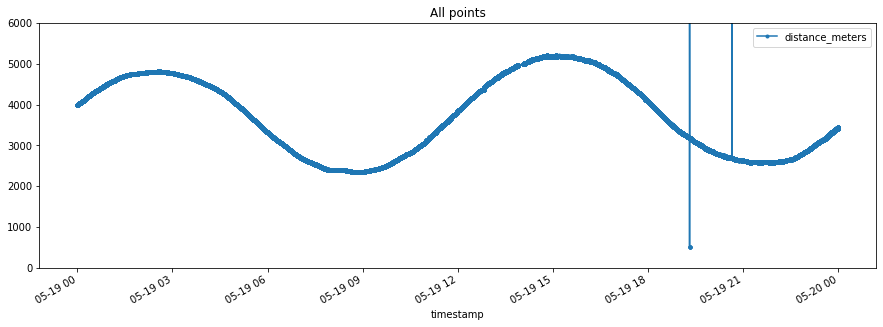

In [39]:
#convert the timestamp to our timezone

#create an index for the date range we'd like
c0 = df.index.to_series().between('2021-5-19', '2021-5-20')

#create a new dataframe using this index
subset=df[c0]


ax=subset.plot(y='distance_meters', style='.-',figsize=(15, 5), use_index=True,title="All points")
ax.set_ylim(0,6000)
#num_rows = len(subset. index)
#rows_per_sec=6
#approx_hours=num_rows/rows_per_sec/(3600)
#print(approx_hours)

<AxesSubplot:xlabel='timestamp'>

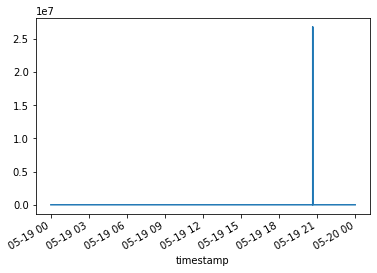

In [46]:
tides=subset['distance_meters']
tides.plot()

<AxesSubplot:xlabel='timestamp'>

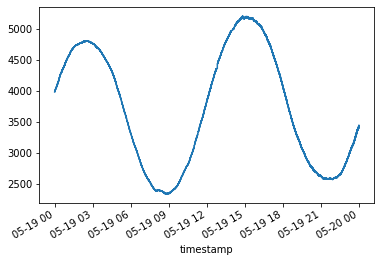

In [47]:
tides=tides[tides < 6000]
tides=tides[tides > 2000]
#tides=tides[tides >]
#tides=tides.sub(tides.mean())
tides.plot()

Text(0, 0.5, 'PSD (dB)')

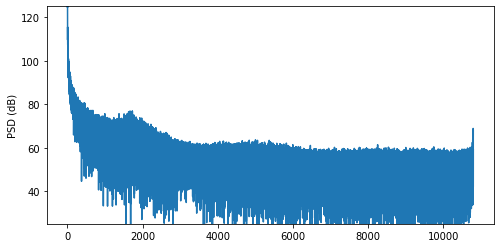

In [80]:
# See:  https://ipython-books.github.io/101-analyzing-the-frequency-components-of-a-signal-with-a-fast-fourier-transform/
# And: https://www.usharbors.com/harbor/maine/belfast-me/tides/
# And: https://www.ritchievink.com/blog/2017/04/23/understanding-the-fourier-transform-by-example/

import matplotlib.pyplot as plt

temp_fft = sp.fftpack.fft(tides.values)
temp_psd = np.abs(temp_fft) ** 2

# want freq unit in hours, i.e. freq of 1: 1 hour
# original sampling rate is 6x/sec
# 6x / sec is 6*60*60 x / hour

timestep = 1/(6*60*60) #in hours
fftfreq = sp.fftpack.fftfreq(len(temp_psd), timestep)
i = fftfreq > 0

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(fftfreq[i], 10 * np.log10(temp_psd[i]))
#ax.set_xlim(0, 3000)
ax.set_ylim(25,125)
#ax.set_xlabel('Frequency (1/minutes)')
ax.set_ylabel('PSD (dB)')

(-5.0, 110.0)

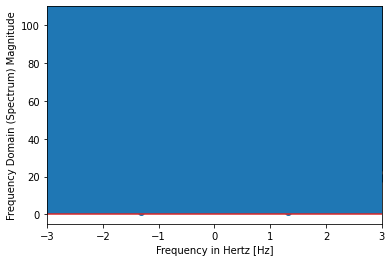

In [81]:
# ref: https://www.oreilly.com/library/view/elegant-scipy/9781491922927/ch04.htmlfrom scipy import fftpack

X = fftpack.fft()
freqs = fftpack.fftfreq(len(x)) * f_s

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-f_s / 2, f_s / 2)
ax.set_ylim(-5, 110)

## Every 10 min

<AxesSubplot:title={'center':'Every 10 min'}, xlabel='timestamp'>

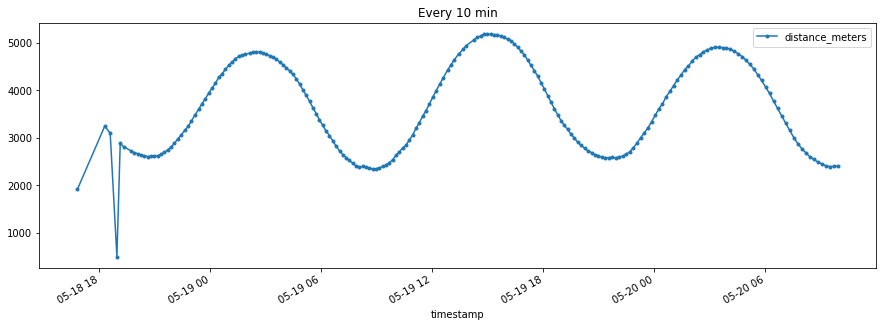

In [21]:
#convert the timestamp to our timezone

#create an index for the date range we'd like
c0 = df.index.to_series().between('2021-5-18 10:00', '2021-5-21')

#create a new dataframe using this index
subset=df[c0]
n_skip = 360*10 # every 5 minutes, if data was sent 6x / sec
subset = subset.iloc[::n_skip, :]

subset.plot(y='distance_meters', style='.-',figsize=(15, 5), use_index=True,title="Every 10 min")